---
title: Regression trees and Random Forests
format:
  html:
    css: "styles.css"
    embed-resources: true
    code-fold: true
---

## Explanation of the modeling methods

The goal of this tab is to build a model to predict the average miles per galon (counting gasoline and diesel). We wil use the following variables as predictors: city, agency, organization type, mode (A system for carrying transit passengers described by specific right-of-way (ROW), technology and operational features), TOS (Describes how public transportation services are provided by the transit agency: directly operated (DO) or purchased transportation (PT) services), and Electric Battery (referring to the use of electric batteries to power the vehicle).

That way, we can not only predict the average miles per galon, but also understand which variables are more important to predict the average miles per galon. This could give us insights on what to do to improve the average miles per galon, which factors are better, and how much fossil fuels we will use in the future with different combinations of all these variables.

### Decision Tree

Decision trees are machine learning models that try to predict the value of a target variable by learning simple decision rules inferred from the data features. They can be used for either classification or regression models. While the can handle both categorical and numerical data at once for either type of model (classification or regression), in implementation, some of the oposite variables will need to be transformed with one-hot encoding in order to run the algorithm (tipically for handling categorical variables). Each internal node in the tree represents a feature or attribute, each branch a decision rule, and each leaf a prediction. The prediction then is always done from the top of the tree to the bottom by following each decision rule.

Decision trees are great for interpreteability and visualization. Their hierarchical structure allow us to visualize the importance of every variable in the decision making process of the tree. However, their tendency to overfit the data makes them less useful for prediction. They tend to capture the noise of the data into their model. To solve this problem, we can use methods like purning, which takes awa the "non-contributing" parts of the tree or hyperparameter tunning, which changes the parameters of the model to make it more generalizable.

Applying decision trees requires to have a target variable (the one that we want to predict) and a set of features (the ones that we will use to predict the target variable). Classification trees focusses on predicting labels while regression trees on numerical values. Depending on your objective and your data, you can use oine or the other. For example, in this case, we want to predict the average miles per galon, which is a continuous variable, so we will use a regression tree. Nevertheless, if we wanted to take a different approach, we could always convert that variable into a categorical one (dividing the data into low mpg, medium mpg, and high mpg), and then use a classification tree instead.

### Random Forest

Random forests are another machine learning algorithm that takes advantage of decision trees. They combine multiple number of decision trees to make a prediction. Each tree operates individually. In order to  generated, random forests use the bootstrapping method to randomly select a subset of the data and also randomly select a subset of the features. This way, each tree is different from the others. this variability tries to reduce the overfitting of the model. However, they also tend to overfit, the same way as a decision tree. To solve this, we can utilize methods like hyperparameter tunning to make the model more generalizable. It is also worth notiong that, since they are built with trees, they can also handle both categorical and numerical data at once for either type of model (classification or regression) but, in implementation, the one-hot encoding needs to be utilized the same way as for a decision tree.

For classification, the final prediction is the one that has the majority of votes from the trees (each tree having one vote). For regression, the final prediction is the overall average of the predictions from each tree. This approach aims for a more accurate than a single decision tree (but this is not always the case). Furthermore, the differences of the features on each tree allows random forests to better handle noise and outliers. 

Random forests can be used in many different situations. Some of the most famous ones are healthcare, finance, or image recognition. Their flexibility and high performance make them a great choice for many different problems. Furthermore, since they are built with trees, they are also great for interpreteability and visualization.

### Hyperparameter Tunning

For both, decision trees and random forests, hyperparameter tunning is a great way to improve the performance of the model. Thus, we will use it for both. Hyperparameters are the con figuration of settings in order to build a model. in decision trees, we will focus on how the depth affect the model accruacy and chose the optimal one to train the model. In random forests, we will focus on the number of trees and the depth of each tree. We will use the same approach as for decision trees to find and then train our optimal model.

### Random classifier
This model will randomly select values and apply them to our predictions. We will use this model as our baseline to compare the performance of our other models.

## Data and libraries

This is how the data used for creating these models looks like:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

df = pd.read_csv('../../data/Clean_Data_project_Pub.Transport_5000/2021_Fuel_and_Energy_mpg_fossil_fuels.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    1053 non-null   object 
 1   Agency                  1056 non-null   object 
 2   Organization Type       1056 non-null   object 
 3   Primary UZA Population  1056 non-null   int64  
 4   Mode                    1056 non-null   object 
 5   TOS                     1056 non-null   object 
 6   Electric Battery        1056 non-null   int64  
 7   avg_mpg_fossil_fuels    1056 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 66.1+ KB


In order to view the shape of the data we want to predict, it will be useful to visualize its shape. This will be more of an EDA step, however, it is better to have it next to our model to understand it better. A violin plot allow us to visualize the distribution of the data and its probability density, which could be useful to understand better the data.

/Users/jorgebrismoreno/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


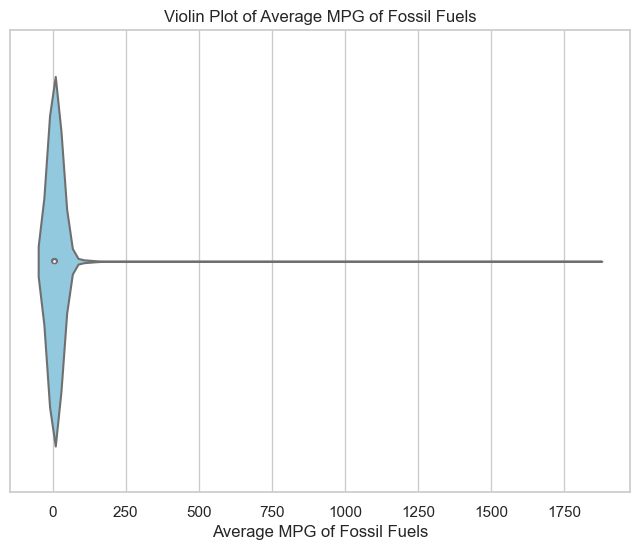

In [56]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.violinplot(x=df['avg_mpg_fossil_fuels'], color='skyblue')

plt.xlabel('Average MPG of Fossil Fuels')
plt.title('Violin Plot of Average MPG of Fossil Fuels')

plt.show()

As we can see from this graph, it seems that there is a high density of data close to 0. This is beneficial to visualize and better understand the nature of the data. Moreover, we can see that there is a wide range of possible values, which could mean that either we have a lot of heavy outliers or very few data samples on those values.

## Base model / random classifier

A random classiffier simply makes random predictions of the data. This is the most basic model we can use to predict our mpg data. We will use this model as a baseline to compare the other models.

In [57]:
def random_regressor_avg_mpg_fossil_fuels(y_data):
    y_pred = np.random.uniform(y_data.min(), y_data.max(), size=len(y_data))
    
    print("---------RANDOM REGRESSOR---------")

    mse = mean_squared_error(y_data, y_pred)
    print("Mean Squared Error:", mse)
    
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error:", rmse)

y_avg_mpg_fossil_fuels = df['avg_mpg_fossil_fuels']

random_regressor_avg_mpg_fossil_fuels(y_avg_mpg_fossil_fuels)


---------RANDOM REGRESSOR---------
Mean Squared Error: 1066824.3696089713
Root Mean Squared Error: 1032.8719037755704


As we can see, it has a very low accruacy, which is expected since it is a random classifier. We will keep this values in mind to compare them with the other models.

## Decision Tree

### Base Decision Tree

This is the base regression tree model for our data set and its results:

In [58]:
y = df['avg_mpg_fossil_fuels']
X = df.drop(columns=['avg_mpg_fossil_fuels'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)

feature_names = list(numeric_features) + list(
    preprocessor.named_transformers_['cat']
    .named_steps['onehot'].get_feature_names_out(categorical_features)
)

regressor = DecisionTreeRegressor(random_state=44)
regressor.fit(X_train_transformed, y_train)

X_test_transformed = preprocessor.transform(X_test)
y_pred = regressor.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 3464.875119590503
Root Mean Squared Error (RMSE): 58.863189852321995


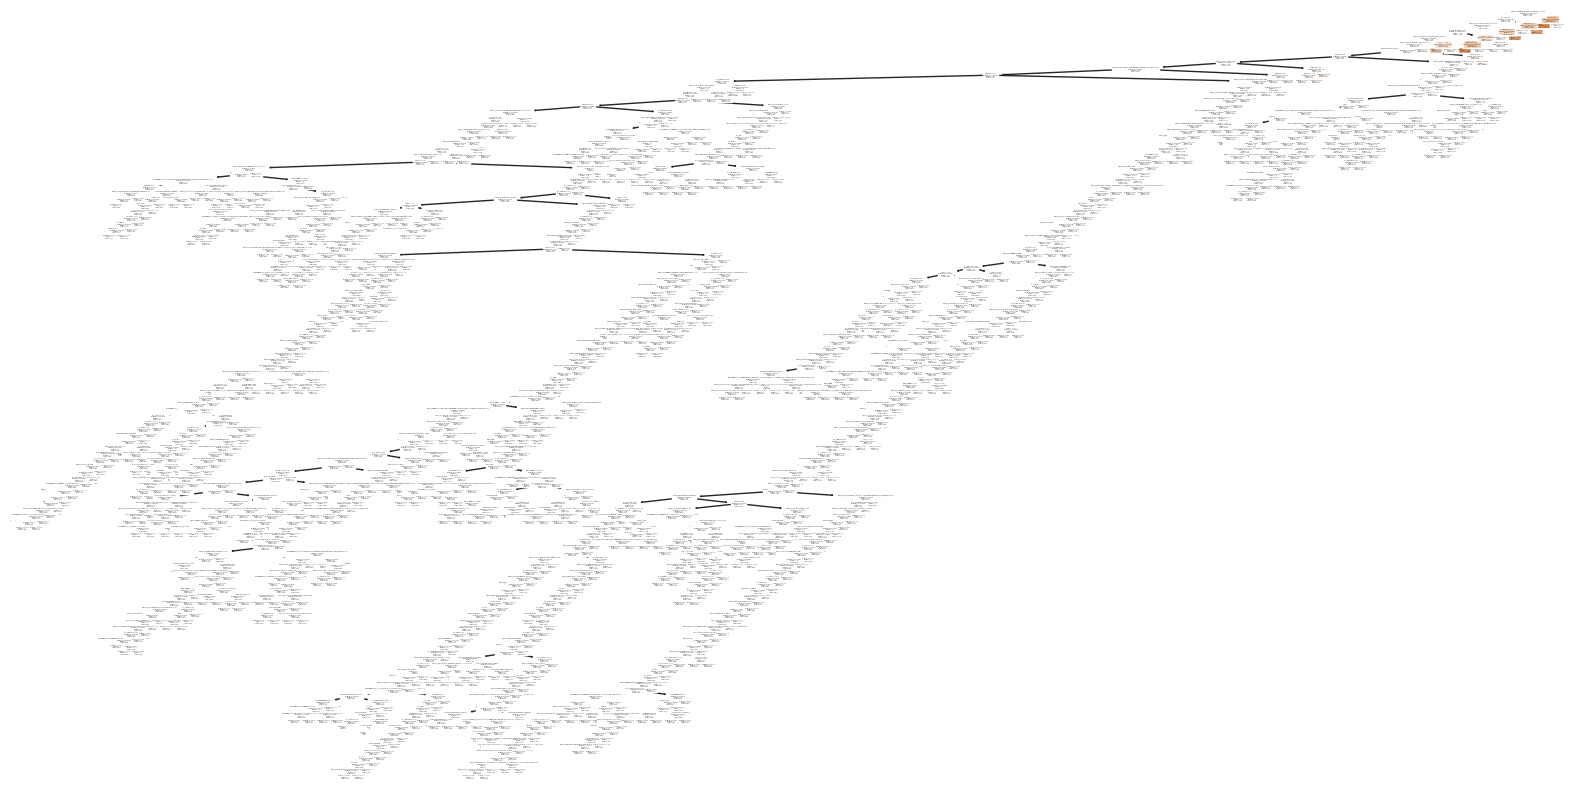

In [59]:
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=feature_names, filled=True)
plt.show()

As we can see, even though it does a much better job than the random classifier, it is still not very accurate. Furthermore, the depth of the tree is impressingly large, which could be a problem for the model. Thus, we are going to tune this model on the next step.

### Hyperparameter tunning on decision tree

In this step, we are going to tune the hyperparameters of the regression tree model. We will vary the depth of the tree to find the optimal one to use.

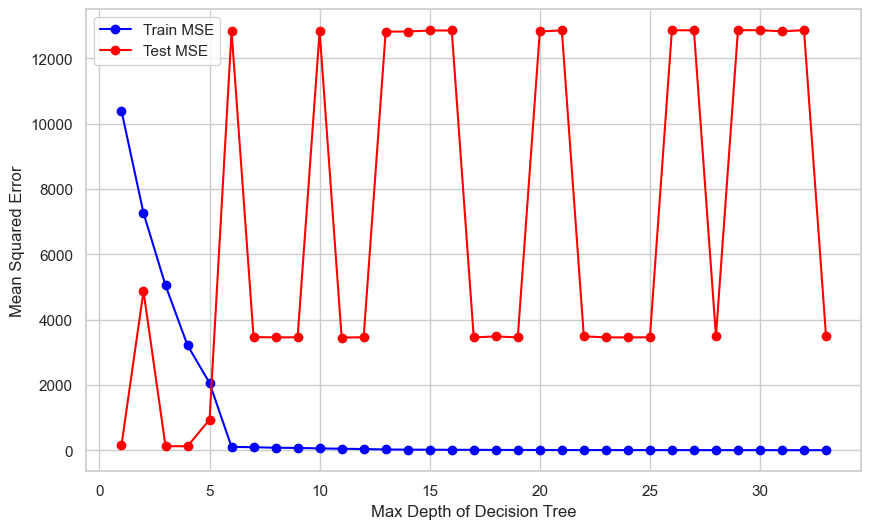

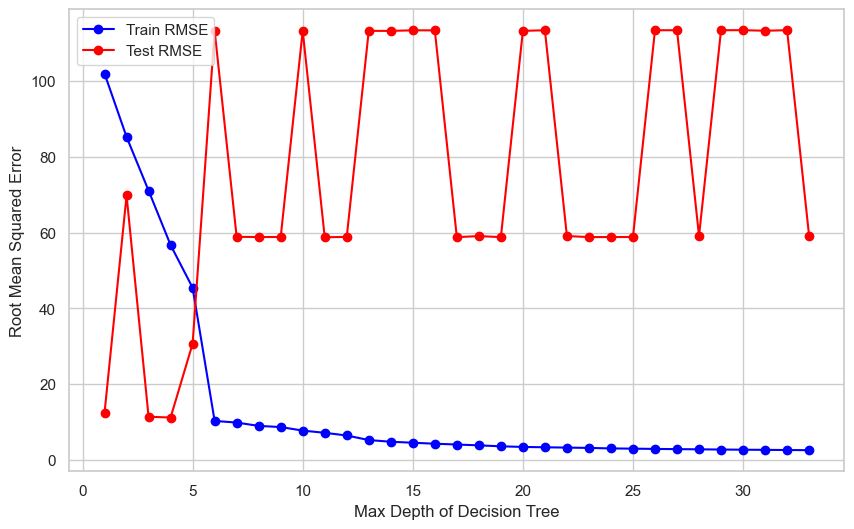

In [60]:
test_results = []
train_results = []

for max_depth in range(1, 34):
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=44)
    model.fit(X_train_transformed, y_train)

    y_pred_train = model.predict(X_train_transformed)
    y_pred_test = model.predict(X_test_transformed)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_results.append([max_depth, train_mse, train_rmse])
    test_results.append([max_depth, test_mse, test_rmse])

max_depth_values = [result[0] for result in test_results]
train_mse_values = [result[1] for result in train_results]
test_mse_values = [result[1] for result in test_results]
train_rmse_values = [result[2] for result in train_results]
test_rmse_values = [result[2] for result in test_results]

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_mse_values, label='Train MSE', marker='o', color='blue')
plt.plot(max_depth_values, test_mse_values, label='Test MSE', marker='o', color='red')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_rmse_values, label='Train RMSE', marker='o', color='blue')
plt.plot(max_depth_values, test_rmse_values, label='Test RMSE', marker='o', color='red')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

From these graphs, we can see that the best depth for the tree is 5, since it has the lowest error for both, the training and the test data. Thus, we will use this depth for the next model.

### Optimal tree

Based on the previous results, we will use a tree with a depth of 5 to predict the mpg data. The tree has the following structure and results:

In [68]:
y = df['avg_mpg_fossil_fuels']
X = df.drop(columns=['avg_mpg_fossil_fuels'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, random_state=44))
])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train Root Mean Squared Error: {train_rmse}")
print(f"Test Root Mean Squared Error: {test_rmse}")

Train Mean Squared Error: 2065.96904233018
Test Mean Squared Error: 941.6117919314114
Train Root Mean Squared Error: 45.45293216427495
Test Root Mean Squared Error: 30.685693603557528


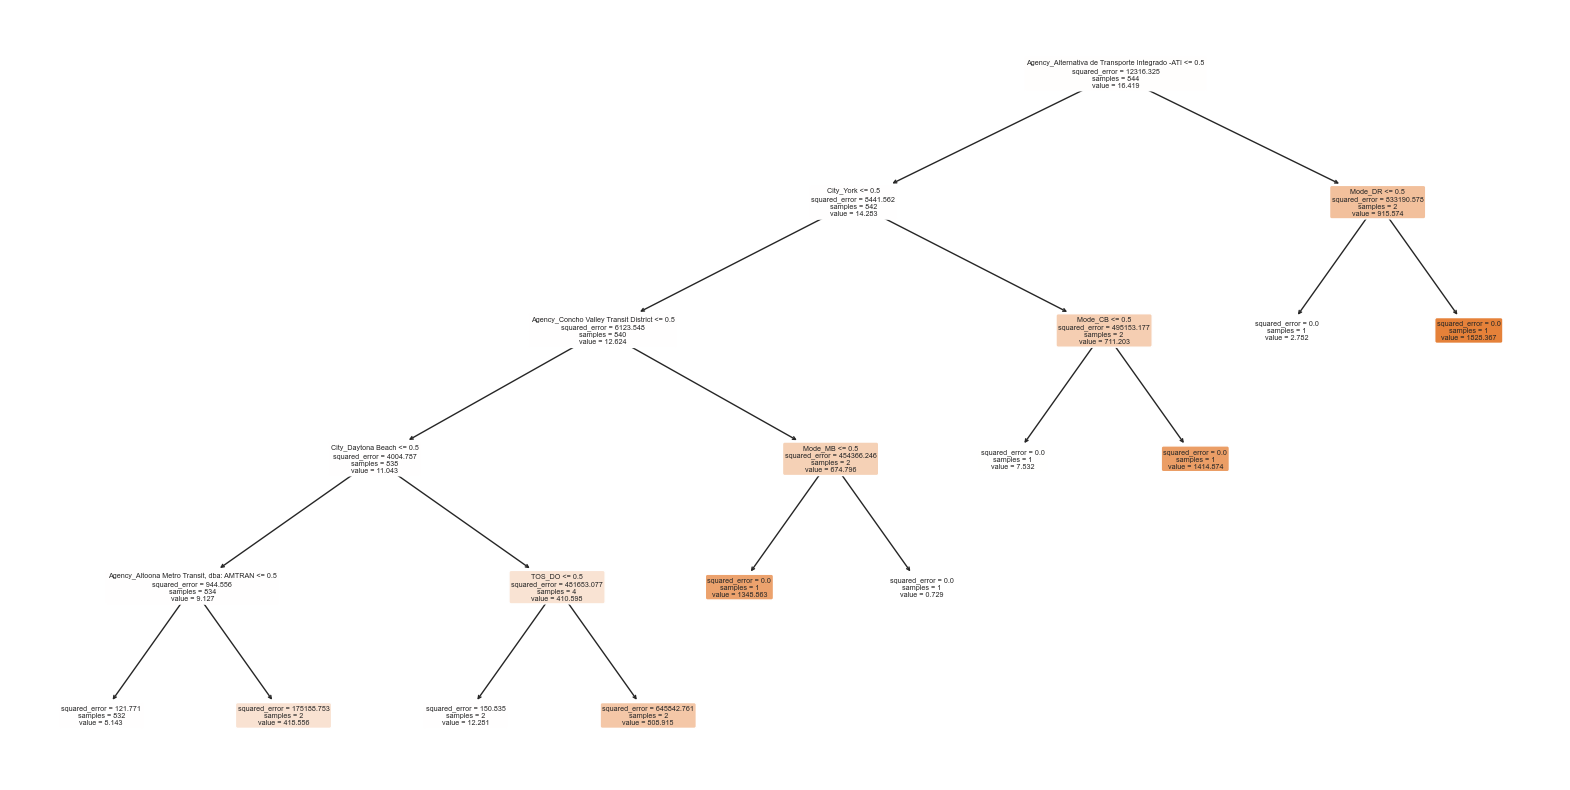

In [69]:
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

categorical_features_names = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(categorical_features_names)

plt.figure(figsize=(20, 10))
plot_tree(model.named_steps['regressor'], feature_names=feature_names, filled=True, rounded=True)
plt.show()

We can see that the MSE is much lower than the previous tree model (cut down by almost half), which means that this model is much more accurate. Furthermore, the depth of the tree is much lower than the previous one, which is good since it means that the model is simpler. Furthermore, we can see that Agency is the most important variable to predict the mpg data, followed by City, Mode, and TOS. This will allow us to make inferences about this variables in the future.

## Random forest

### Base Random Forest

This is the base random forest model for our data set, its results, and the first three trees of the forest:

In [82]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=44)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_regressor)
])

pipeline.fit(X_train, y_train)

y_pred_train_rf = pipeline.predict(X_train)
y_pred_test_rf = pipeline.predict(X_test)

train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

print("Random Forest Regressor Results:")
print("Train Mean Squared Error:", train_mse_rf)
print("Test Mean Squared Error:", test_mse_rf)
print("Train Root Mean Squared Error:", train_rmse_rf)
print("Test Root Mean Squared Error:", test_rmse_rf)

Random Forest Regressor Results:
Train Mean Squared Error: 2544.263281758251
Test Mean Squared Error: 4549.356195127014
Train Root Mean Squared Error: 50.4406907343491
Test Root Mean Squared Error: 67.44891544811536


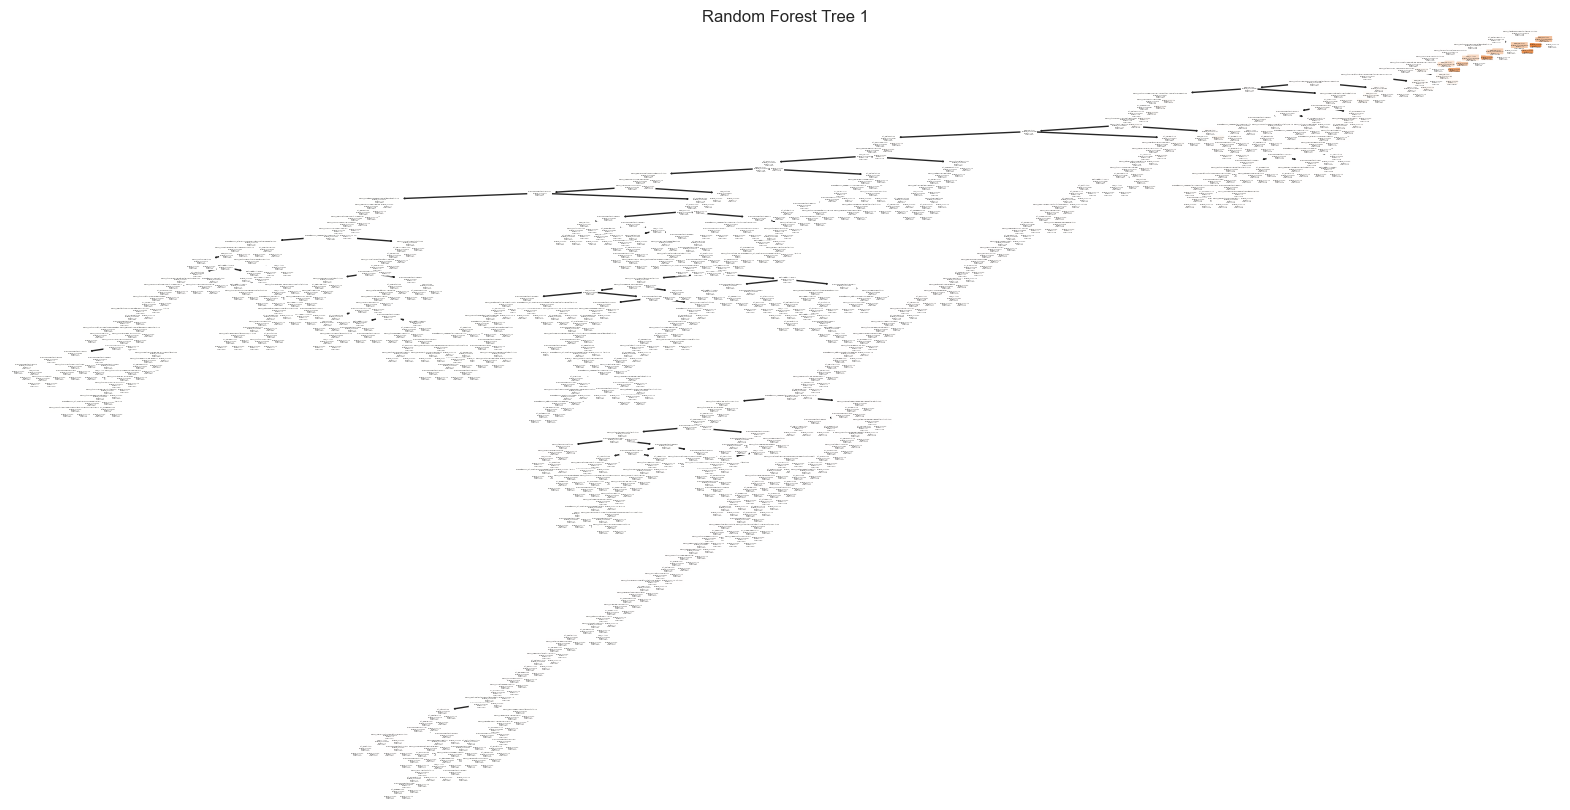

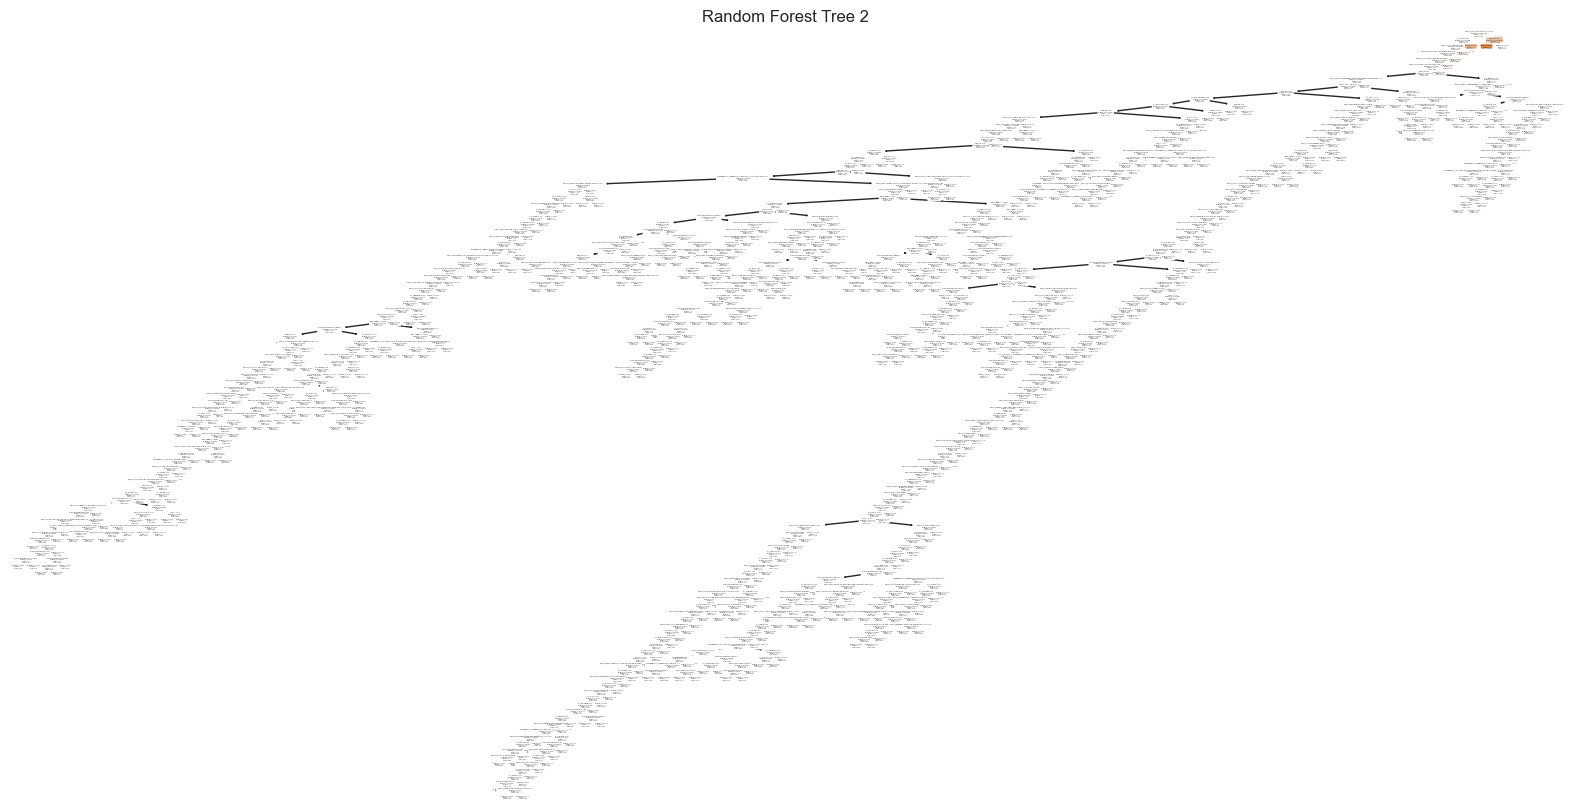

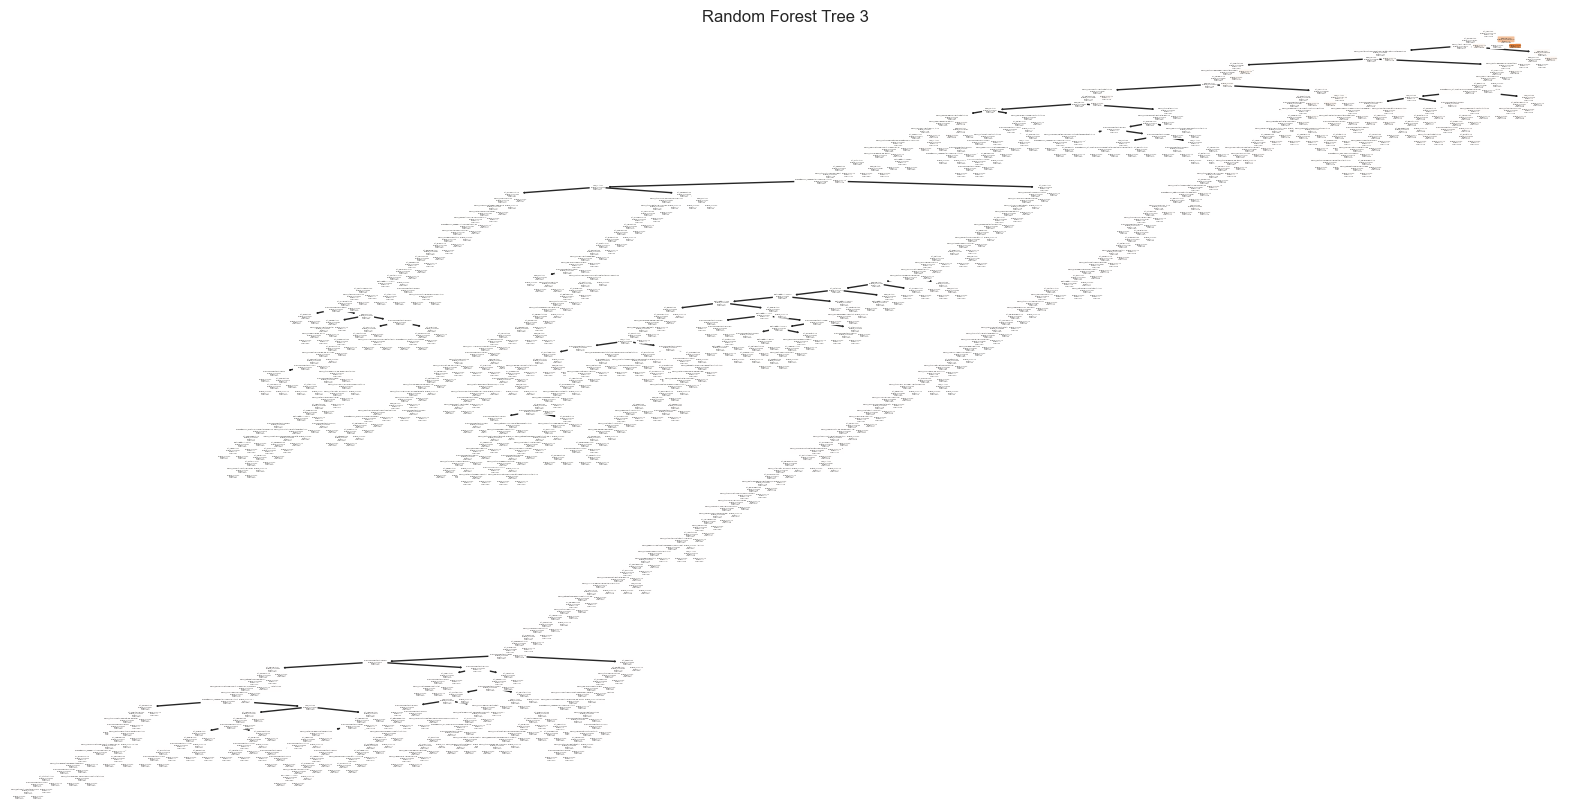

In [78]:
rf_regressor = pipeline.named_steps['regressor']

categorical_features = X.select_dtypes(include=['object']).columns
feature_names = list(numeric_features) + list(
    pipeline.named_steps['preprocessor'].named_transformers_['cat']
    .named_steps['onehot'].get_feature_names_out(categorical_features)
)

for i in range(3):
    plt.figure(figsize=(20, 10))
    plot_tree(rf_regressor.estimators_[i], feature_names=feature_names, filled=True, rounded=True)
    plt.title(f"Random Forest Tree {i+1}")
    plt.show()

As we can see, the accruacy is seems to be much worse for our test data compared to the optimal decision tree (as the MSE is much higher). However, the trees look very large and seems that this model can be improved to perform even better while being more interpretable. Thus, we are going to tune this model on the next step.

### Hyperparameter tunning on random forest

In this step, we are going to tune the hyperparameters of the random forest model. We will vary the depth of the trees and the number of estimators to find the optimal one to use.

In [96]:
param_dist = {
    'regressor__n_estimators': randint(44, 444),
    'regressor__max_depth': randint(1, 24),
}

rand_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rand_search.fit(X_train, y_train)

best_rf_model = rand_search.best_estimator_

y_pred_train_best = best_rf_model.predict(X_train)
y_pred_test_best = best_rf_model.predict(X_test)

mse_train_best = mean_squared_error(y_train, y_pred_train_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_train_best = np.sqrt(mse_train_best)
rmse_test_best = np.sqrt(mse_test_best)

print("Best Model Metrics:")
print(f"Train Mean Squared Error: {mse_train_best}")
print(f"Test Mean Squared Error: {mse_test_best}")
print(f"Train Root Mean Squared Error: {rmse_train_best}")
print(f"Test Root Mean Squared Error: {rmse_test_best}")

print("Best Hyperparameters:")
print(rand_search.best_params_)


Best Model Metrics:
Train Mean Squared Error: 6362.505730760978
Test Mean Squared Error: 1823.3688800609457
Train Root Mean Squared Error: 79.76531659036387
Test Root Mean Squared Error: 42.700923644119754
Best Hyperparameters:
{'regressor__max_depth': 2, 'regressor__n_estimators': 326}


From this results, we can inferr that the best depth of the trees are 2 and the regressor estimators is 326. Thus, we will use these parameters for the next model.

### Optimal random forest


Based on the previous results, we will use a random forests with trees of a depth of 3 and 140 estimators to predict the mpg data. The forest has the following results and the first three trees of the forest look like the following:

In [97]:
best_hyperparameters = {'max_depth': 2, 'n_estimators': 326}

pipeline.named_steps['regressor'].set_params(**best_hyperparameters)

pipeline.fit(X_train, y_train)

y_pred_train_optimal = pipeline.predict(X_train)
y_pred_test_optimal = pipeline.predict(X_test)

mse_train_optimal = mean_squared_error(y_train, y_pred_train_optimal)
mse_test_optimal = mean_squared_error(y_test, y_pred_test_optimal)
rmse_train_optimal = np.sqrt(mse_train_optimal)
rmse_test_optimal = np.sqrt(mse_test_optimal)

print("Optimal Model Metrics:")
print(f"Train Mean Squared Error: {mse_train_optimal}")
print(f"Test Mean Squared Error: {mse_test_optimal}")
print(f"Train Root Mean Squared Error: {rmse_train_optimal}")
print(f"Test Root Mean Squared Error: {rmse_test_optimal}")

Optimal Model Metrics:
Train Mean Squared Error: 6362.505730760978
Test Mean Squared Error: 1823.3688800609457
Train Root Mean Squared Error: 79.76531659036387
Test Root Mean Squared Error: 42.700923644119754


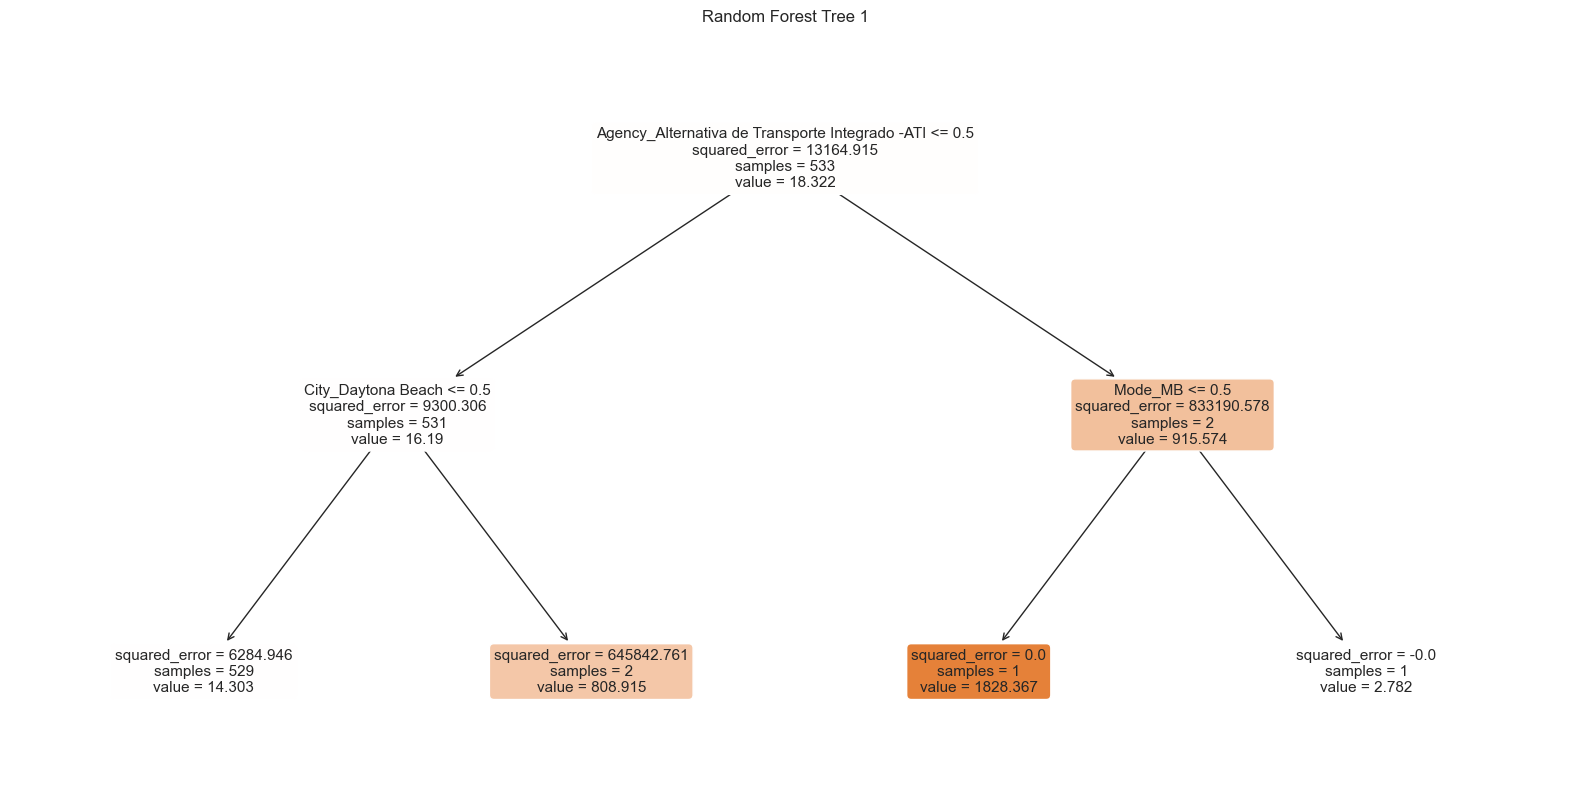

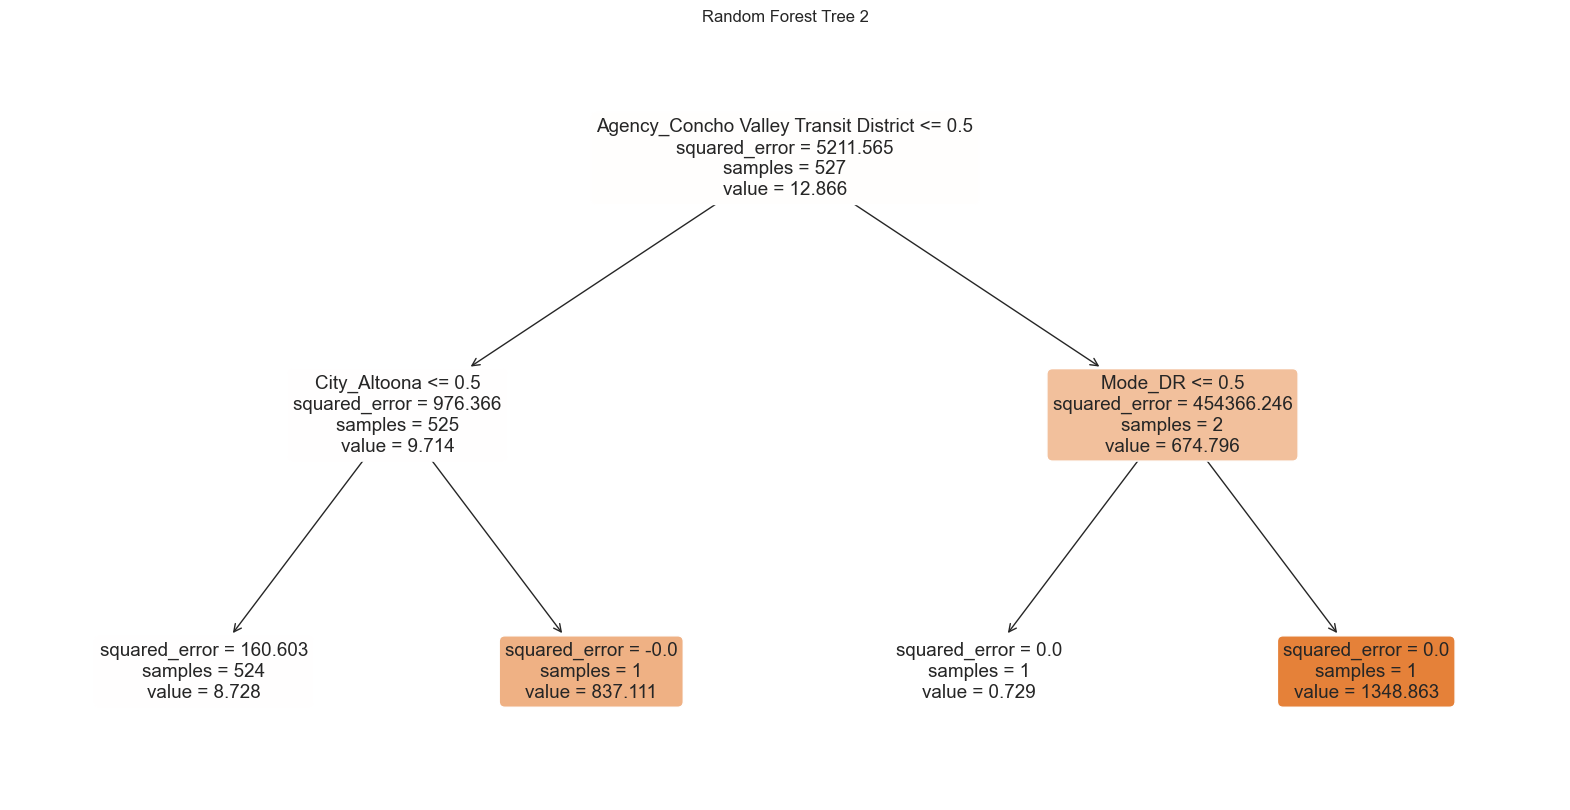

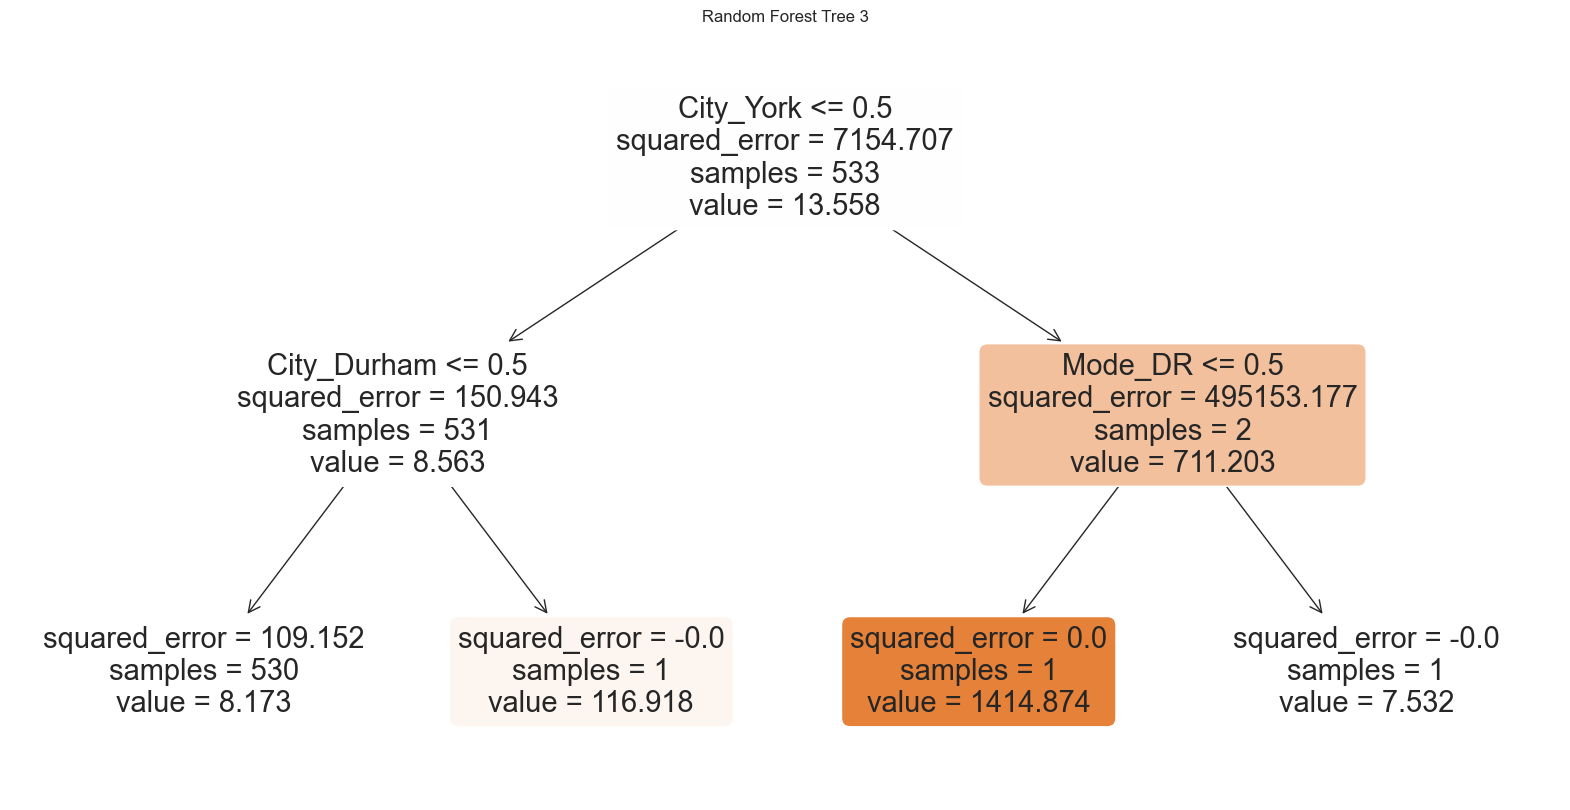

In [98]:
rf_regressor = pipeline.named_steps['regressor']

categorical_features = X.select_dtypes(include=['object']).columns
feature_names = list(numeric_features) + list(
    pipeline.named_steps['preprocessor'].named_transformers_['cat']
    .named_steps['onehot'].get_feature_names_out(categorical_features)
)

for i in range(min(3, len(rf_regressor.estimators_))):
    plt.figure(figsize=(20, 10))
    plot_tree(rf_regressor.estimators_[i], feature_names=feature_names, filled=True, rounded=True)
    plt.title(f"Random Forest Tree {i+1}")
    plt.show()

As we can see, the most important predictors still seem to be Agency, City and Mode. However, the MSE is greater than our optimal decision tree, which means that this model is less accurate.

## Conclusion

From the previous results, we can conclude that the best model to predict the mpg data is our optimal decision tree with a depth of 5. This model has a MSE of for 941.61 for the test data, which seems to be a good result due to the distribution of our data as seen before. Furthermore, the most important predictors are Agency, City, TOS, and Mode, which means that these variables are the most important to predict the mpg data. This could give us insights on what to do to improve the average miles per galon, which factors are better, and how much fossil fuels we will use in the future based on different characteristics.

Now that it seems that we have a good model to predict the mpg data, we can use it to predict the mpg data for the next year. Moreover, we can start to investigate how different agencies, cities, TOS, and Mode might affect the efficiency of the vehicles used and make recommendations for changes in the future. This will help ius visualize how much our carbon footprint will be reduced in the future with those changes and we can predict our future mpg based on those changes.